In [37]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [20]:
advertising = pd.DataFrame(pd.read_csv("/content/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
advertising.shape

(200, 4)

In [22]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data cleaning

In [24]:
advertising.isnull().sum()*100/advertising.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


clean data verified

Sales

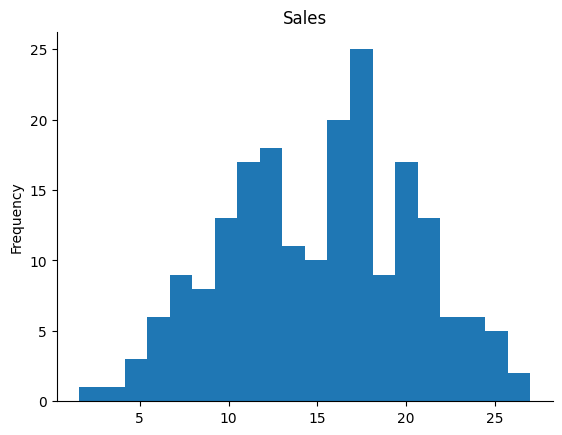

In [9]:
from matplotlib import pyplot as plt
advertising['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

Newspaper

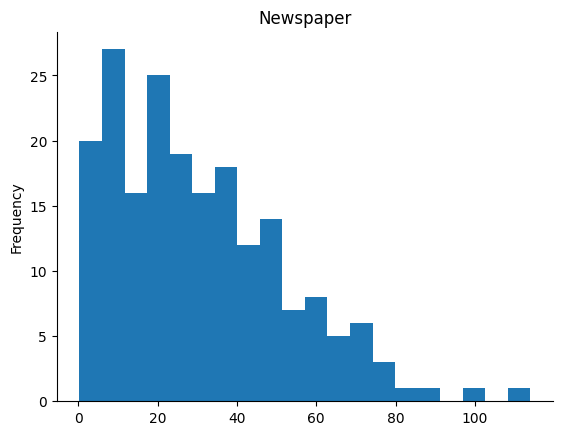

In [7]:
from matplotlib import pyplot as plt
advertising['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

Radio

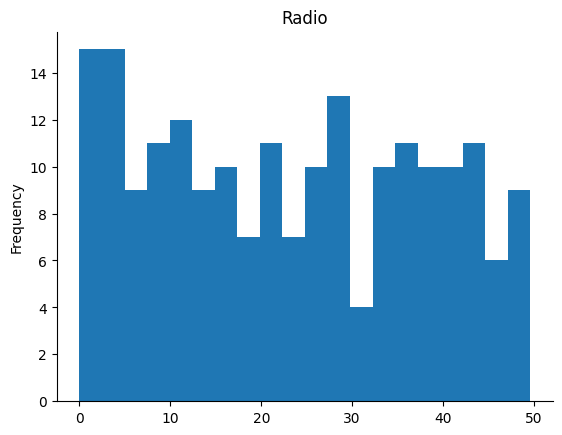

In [6]:
from matplotlib import pyplot as plt
advertising['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

TV

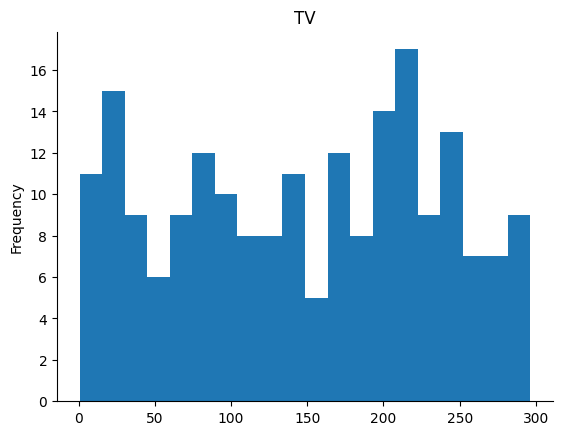

In [5]:
from matplotlib import pyplot as plt
advertising['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)


Radio vs Newspaper



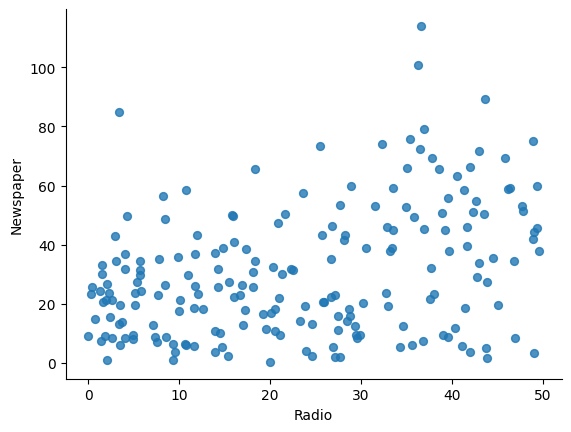

In [11]:
from matplotlib import pyplot as plt
advertising.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

TV vs Radio

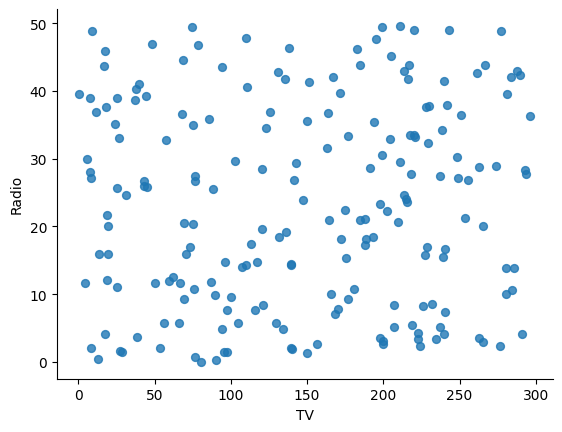

In [10]:
from matplotlib import pyplot as plt
advertising.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Newspaper vs Sales

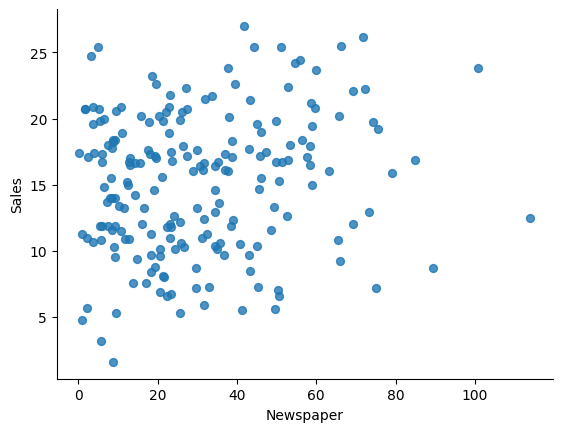

In [12]:
from matplotlib import pyplot as plt
advertising.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

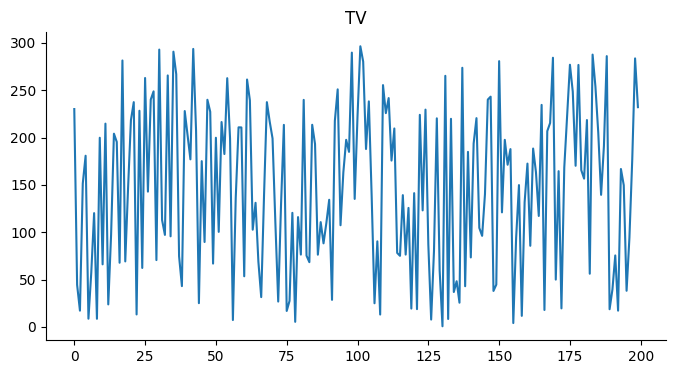

In [14]:
from matplotlib import pyplot as plt
advertising['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

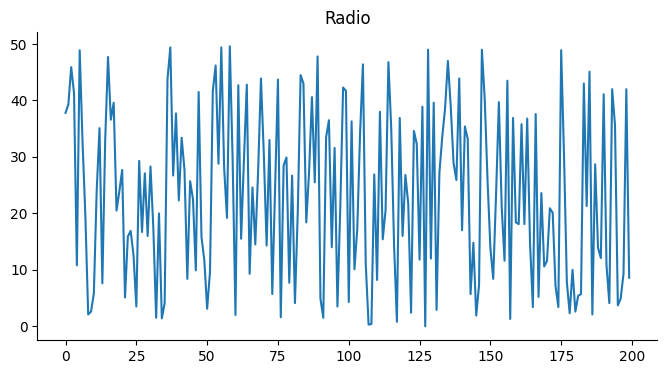

In [15]:
from matplotlib import pyplot as plt
advertising['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

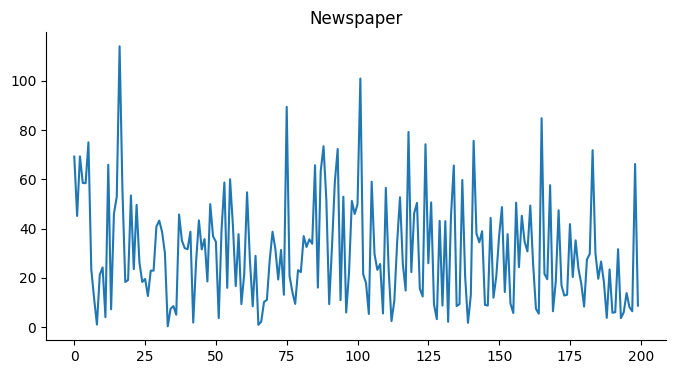

In [16]:
from matplotlib import pyplot as plt
advertising['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

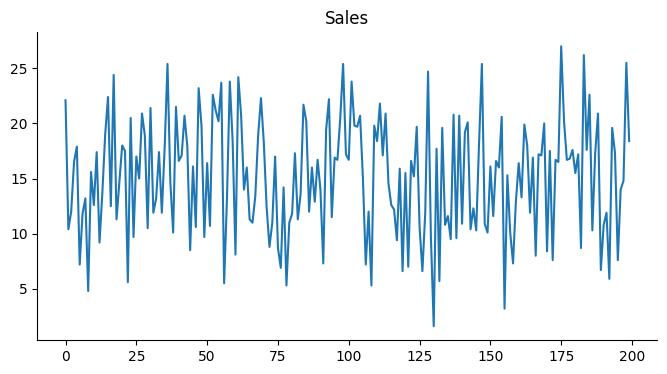

In [17]:
from matplotlib import pyplot as plt
advertising['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

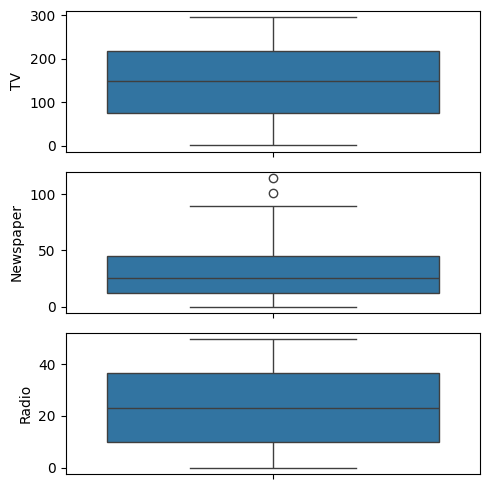

In [25]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

In [28]:
sns.heatmap(advertising.corr(), annot=True, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

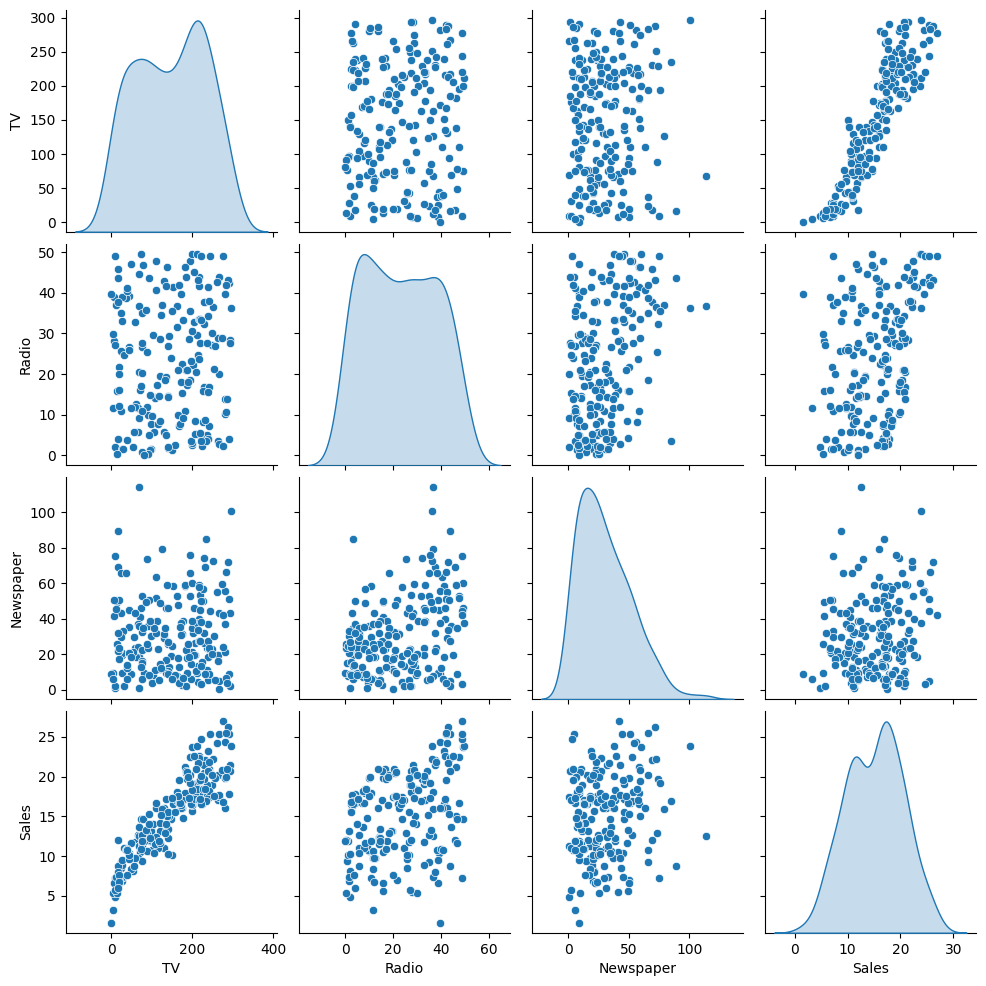

In [29]:
sns.pairplot(advertising, diag_kind='kde')
plt.show()

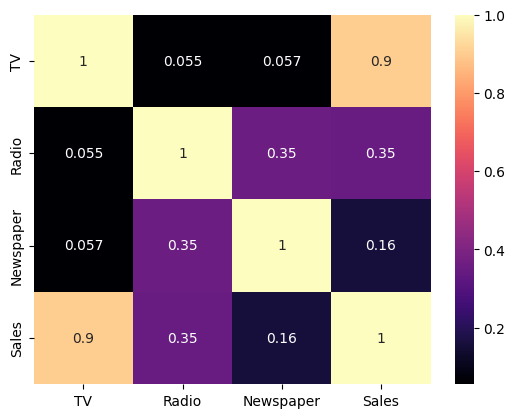

In [33]:
sns.heatmap(advertising.corr(), cmap="magma", annot = True)
plt.show()

In [34]:
import numpy as np
X = advertising['TV']
y = advertising['Sales']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.077556371826948
R-squared: 0.7921031601245662


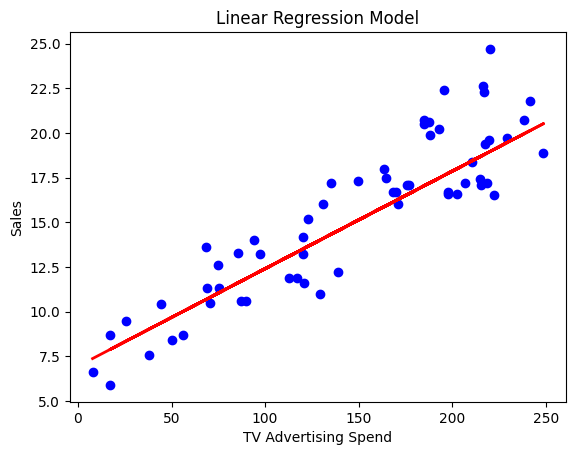

In [44]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

In [46]:
import pandas as pd

X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.6360765623280655
R-squared: 0.8655979373420272


In [51]:
print(f"Regression Coefficients:\n{pd.DataFrame({'Feature': X.columns, 'Coefficient': regressor.coef_})}")

Regression Coefficients:
     Feature  Coefficient
0         TV     0.053829
1      Radio     0.110012
2  Newspaper     0.006290


In [55]:
y_pred = regressor.predict(X_test)

In [56]:
predictions_df = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})

In [57]:
print(predictions_df)

     Actual Sales  Predicted Sales
126           6.6         9.352211
104          20.7        20.963446
99           17.2        16.488511
92           19.4        20.109710
111          21.8        21.671484
167          17.2        16.160544
116          12.2        13.561806
96           16.7        15.393381
52           22.6        20.819808
69           22.3        21.005371
164          11.9        12.294513
124          19.7        20.708486
182           8.7         8.173673
154          20.6        16.824715
125          10.6        10.489548
196          14.0         9.995306
194          17.3        16.346989
177          16.7        14.575812
163          18.0        17.230651
31           11.9        12.568907
11           17.4        18.557159
73           11.0        12.124028
15           22.4        20.433126
41           17.1        17.780178
97           20.5        16.736234
128          24.7        21.603876
133          19.6        20.135321
82           11.3   

In [58]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.73e-71
Time:                        14:39:31   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

In [59]:
X_test_sm = sm.add_constant(X_test)

In [60]:
y_pred = lr.predict(X_test_sm)

In [61]:
print(y_pred[:5])

126     9.352211
104    20.963446
99     16.488511
92     20.109710
111    21.671484
dtype: float64


In [62]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 1.6235998775338956
R-squared: 0.8655979373420264


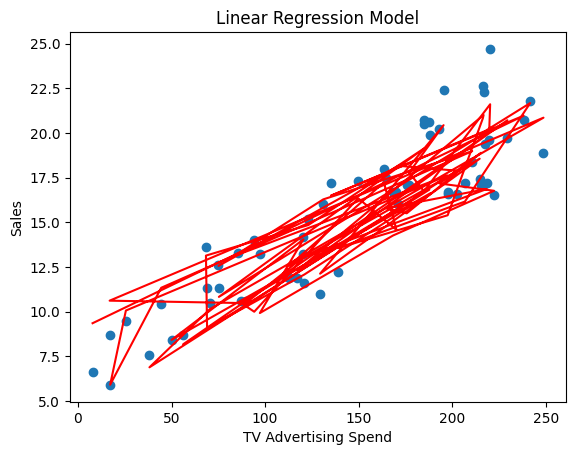

In [69]:
import matplotlib.pyplot as plt
plt.scatter(X_test['TV'], y_test)
plt.plot(X_test['TV'], y_pred, color='red')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Linear Regression Model')
plt.show()

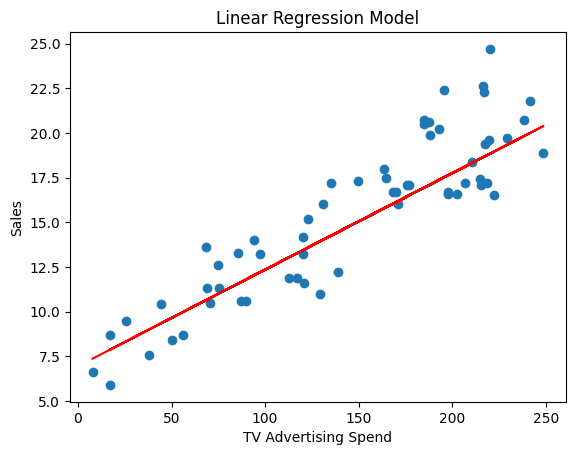

In [70]:
import matplotlib.pyplot as plt
plt.scatter(X_test['TV'], y_test)
plt.plot(X_test['TV'], 6.948 + 0.054 * X_test['TV'], 'r')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Linear Regression Model')
plt.show()
